# Guided Project: Predicting Bike Rentals

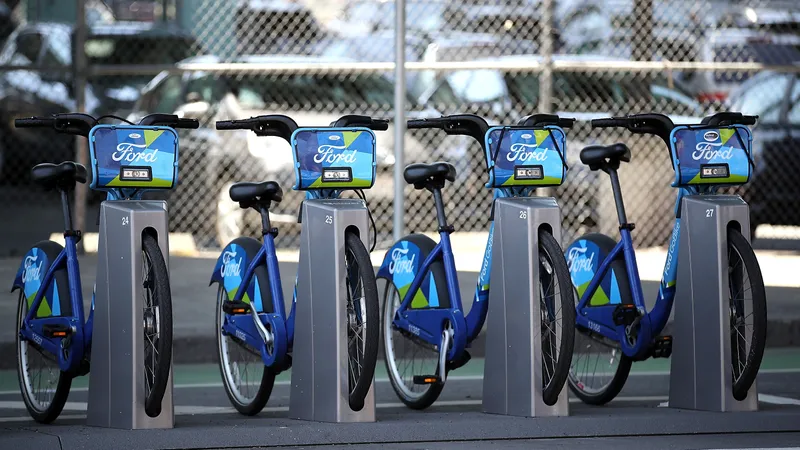


Many U.S. cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

The data we using was compiled by Hadi Fanee-T at the University of Porto. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Explore the data

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head(10)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
bike_rentals.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17369,17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17370,17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17371,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17372,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
17373,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [4]:
print(bike_rentals.shape)
print(bike_rentals.info())

(17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Descriptions of columns in dataset (refer to the source: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset):
- __instant__: record index
- __dteday__ : date
- __season__ : season (1:winter, 2:spring, 3:summer, 4:fall)
- __yr__ : year (0: 2011, 1:2012)
- __mnth__ : month ( 1 to 12)
- __hr__ : hour (0 to 23)
- __holiday__ : weather day is holiday or not (extracted from [Web Link])
- __weekday__ : day of the week
- __workingday__ : if day is neither weekend nor holiday is 1, otherwise is 0.
- __weathersit__ :
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- __temp__ : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- __atemp__: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- __hum__: Normalized humidity. The values are divided to 100 (max)
- __windspeed__: Normalized wind speed. The values are divided to 67 (max)
- __casual__: count of casual users
- __registered__: count of registered users
- __cnt__: count of total rental bikes including both casual and registered


Since our target column is __cnt__, we going to plot a histogram on this columns and calculate the correlation to examine how each column is correlated to __cnt__

(array([5616., 2669., 2392., 1900., 1413., 1006.,  704.,  552.,  394.,
         263.,  190.,  104.,  105.,   55.,   16.]),
 array([  1.        ,  66.06666667, 131.13333333, 196.2       ,
        261.26666667, 326.33333333, 391.4       , 456.46666667,
        521.53333333, 586.6       , 651.66666667, 716.73333333,
        781.8       , 846.86666667, 911.93333333, 977.        ]),
 <BarContainer object of 15 artists>)

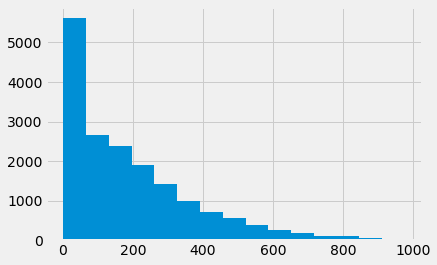

In [5]:
plt.hist(bike_rentals['cnt'], bins=15)

In [6]:
bike_rentals['cnt'].value_counts().sort_index()

1      158
2      208
3      224
4      231
5      260
      ... 
967      1
968      1
970      1
976      1
977      1
Name: cnt, Length: 869, dtype: int64

Since sum of _casual_ and _registered_ equals to _cnt_, we can drop these 2 columns. Then calculate the correlation and plot the heatmap

In [7]:
bike_rentals = bike_rentals.drop(['casual', 'registered', 'instant'], axis = 1, errors='ignore')
corr = abs(bike_rentals.corr())
corr

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,0.010742,0.830386,0.006117,0.009585,0.002335,0.013743,0.014524,0.312025,0.319380,0.150625,0.149773,0.178056
yr,0.010742,1.000000,0.010473,0.003867,0.006692,0.004485,0.002196,0.019157,0.040913,0.039222,0.083546,0.008740,0.250495
mnth,0.830386,0.010473,1.000000,0.005772,0.018430,0.010400,0.003477,0.005400,0.201691,0.208096,0.164411,0.135386,0.120638
hr,0.006117,0.003867,0.005772,1.000000,0.000479,0.003498,0.002285,0.020203,0.137603,0.133750,0.276498,0.137252,0.394071
holiday,0.009585,0.006692,0.018430,0.000479,1.000000,0.102088,0.252471,0.017036,0.027340,0.030973,0.010588,0.003988,0.030927
weekday,0.002335,0.004485,0.010400,0.003498,0.102088,1.000000,0.035955,0.003311,0.001795,0.008821,0.037158,0.011502,0.026900
workingday,0.013743,0.002196,0.003477,0.002285,0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,0.011830,0.030284
weathersit,0.014524,0.019157,0.005400,0.020203,0.017036,0.003311,0.044672,1.000000,0.102640,0.105563,0.418130,0.026226,0.142426
temp,0.312025,0.040913,0.201691,0.137603,0.027340,0.001795,0.055390,0.102640,1.000000,0.987672,0.069881,0.023125,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,0.030973,0.008821,0.054667,0.105563,0.987672,1.000000,0.051918,0.062336,0.400929


<ipython-input-8-ddb74ec1aa4e>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


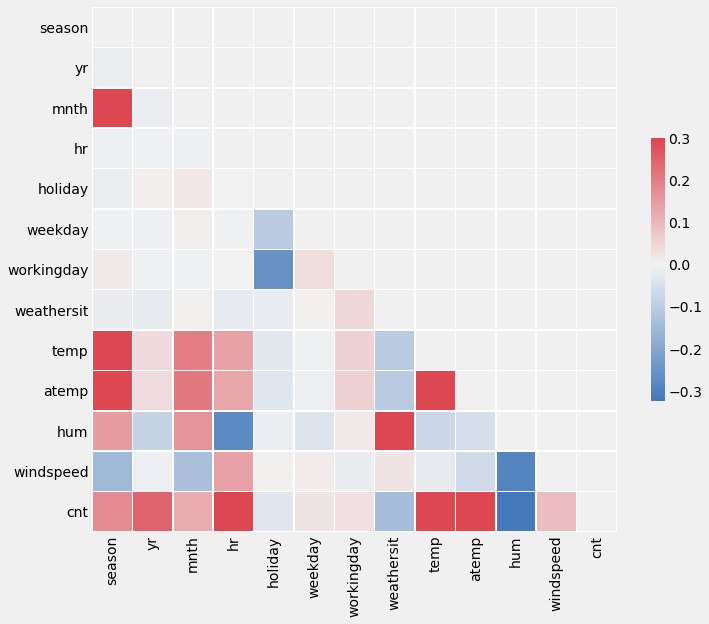

In [8]:
import seaborn as sns
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    #sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(250, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
    
plot_correlation_heatmap(bike_rentals)

<AxesSubplot:ylabel='Frequency'>

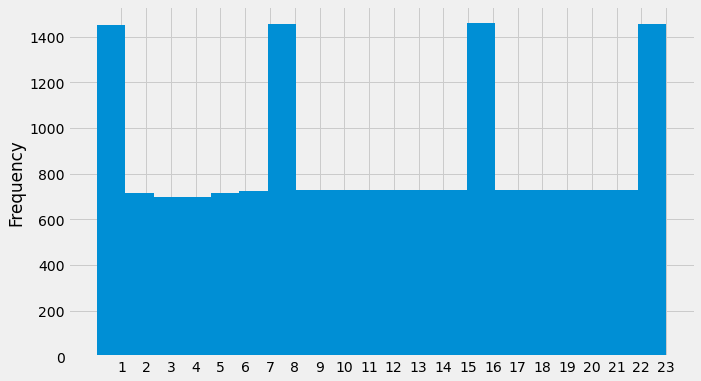

In [9]:
bike_rentals['hr'].plot.hist(bins=20, xticks = np.arange(1,24,1), figsize=(10,6))

We will do some features calculation/tweak before developing a model. Since machine treats each hour differently, without understanding that certain hours are related. We will assign a time label (by adding a new column __time_label__). This columns has values: 
- __1__ if the hour is from __6__ to __12__ (morning)
- __2__ if the hour is from __12__ to __18__ (afternoon)
- __3__ if the hour is from __18__ to __24__ (evening)
- __4__ if the hour is from __0__ to __6__ (night)

In [10]:
def assign_label(x):
    if (x > 6) & (x < 12):
        label = 1
    elif (x >= 12) & (x < 18):
        label = 2
    elif (x >= 18) & (x <= 24):
        label = 3
    elif (x >= 0) & (x <= 6):
        label = 4
    return label

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,time_label
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,4
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,4
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,4
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,4
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,4


After exploring dataset, it is evident that our model is a Regression model, not a Classifier, some possible error metrics are:
- mean absoluate error (MAE)
- mean squared error (MSE)
- root mean squared error (RMSE)
- R squared ($R^2$)
- Adjustred R squared ($\bar{R^2}$)

Since we are interested in how closely accurate our model predicts and would like to have a better sense when interpreting the data, plus the range of __cnt__ column are quite large , it can go as high as 900 range which can skew the MSE and RMSE significantly due to the nature of squaring. Therefore, we will pick __MAE__ and $R^2$ for our error metrics.

## Split data into train and test set

Training set will contain 80% of the rows in bike_rentals

__Note: This training and testing set will remain unchanged from this point onward__

In [11]:
train = bike_rentals.sample(frac=0.8, replace=False, random_state=2).copy()
train.shape

(13903, 15)

In [12]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)].copy()
test.shape

(3476, 15)

## Linear Regression

Based on the correlation table above, we will only select columns that have correlation > 0.1 (we might experiement with our choices) and also drop out columns __dtedate__, __instant__ since these columns add no meaning in our model.

In [13]:
selected_corr = corr['cnt']
features = selected_corr[selected_corr > 0.1].index #select only index whose corr < 0.1
features = features.drop(['instant', 'dtedate', 'cnt'], errors='ignore') #drop target and irrelevant columns
target = 'cnt'
print(features)

Index(['season', 'yr', 'mnth', 'hr', 'weathersit', 'temp', 'atemp', 'hum'], dtype='object')


In [14]:
linear_model = LinearRegression()
linear_model.fit(train[features], train[target])
train_predictions = linear_model.predict(train[features])
test_predictions = linear_model.predict(test[features])

train_mae = mean_absolute_error(train[target], train_predictions)
test_mae = mean_absolute_error(test[target], test_predictions)

print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)
print("Test R^2 = ", r2_score(test[target],test_predictions))


Train MAE =  106.55191201270634
Test MAE =  103.9598907562063
Test R^2 =  0.38492205842659777


Both MAE (104 bikes) and $R^2$ (0.385) on the test show that linear regression is not a great model for this dataset. If the MAE is 104 then that's an error of 104 bikes which is useless. 

Next we will apply different model which is Decision Tree and hopefully get a better result. 

Decision trees tend to predict outcomes much more reliably than linear regression models, because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

## Decision Tree

We will select all columns except __cnt__, __instant__, and __dteday__ as features for the model

In [15]:
features = bike_rentals.columns
features = features.drop(['cnt', 'instant','dteday'], errors='ignore')
print(features)

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label'],
      dtype='object')


Start training and testing

In [16]:
dt_model = DecisionTreeRegressor()
dt_model.fit(train[features], train[target])

train_predictions = dt_model.predict(train[features])
test_predictions = dt_model.predict(test[features])

train_mae = mean_absolute_error(train[target], train_predictions)
test_mae = mean_absolute_error(test[target], test_predictions)

print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)
print("Test R^2 = ", r2_score(test[target],test_predictions))

Train MAE =  0.01193986909300151
Test MAE =  34.30207134637514
Test R^2 =  0.8919127418669469


__Oservations__ :As expected, both __test__ and __train MAE__ drop significantly compared to linear regression model (__66.8%__ and  __99%__ drop respectively), which is a good sign that our model has improved. However, the train MAE is drastically lower than test MAE which indicates that the model is overfitting. 

To fix overfitting, next we will tweak the __min_samples_leaf__ parameter in the model. We will train the model for each value of this parameter in range 1 and 20 and plot the test MAE in each case.

### Fixing Overfitting

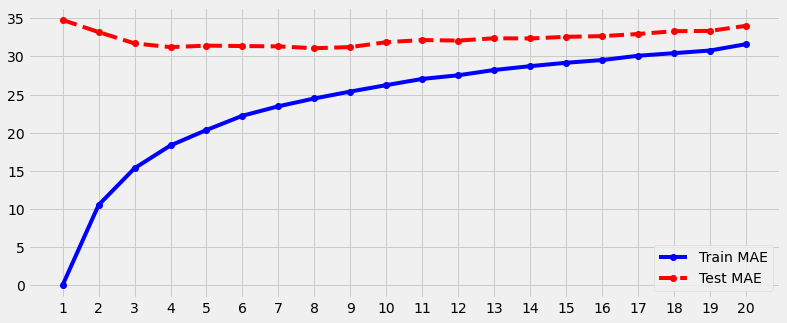

In [17]:
min_samples_leaf = np.arange(1,21)

train_MAEs = []
test_MAEs = []
for msl in min_samples_leaf:
    dt_model = DecisionTreeRegressor(min_samples_leaf = msl)
    dt_model.fit(train[features], train[target])
    
    train_predictions = dt_model.predict(train[features])
    test_predictions = dt_model.predict(test[features])

    train_MAEs.append(mean_absolute_error(train[target], train_predictions))
    test_MAEs.append(mean_absolute_error(test[target], test_predictions))
    
plt.figure(figsize=(12,5))
plt.plot(min_samples_leaf,train_MAEs, c='b', marker='o', label='line with marker')
plt.plot(min_samples_leaf, test_MAEs, c='r', linestyle='--', marker='o', label='line with marker')
plt.xticks(min_samples_leaf)
plt.legend(['Train MAE', 'Test MAE'])
plt.show()
    

In general, as we increase the __min_samples_leaf__, the train MAE increases and test MAE decreases. However, the test MAE does not improve further, or even get worse, as we go beyond __min_samples_leaf__ = 3 while train MAE keeps increasing. Hence the optimal point is __min_samples_leaf__ = 3.

### Final Decision Tree Settings
We will conclude our DecisionTree model with this setting and print out final MAEs and R squared.

In [18]:
dt_model = DecisionTreeRegressor(min_samples_leaf = 4)
dt_model.fit(train[features], train[target])

train_predictions = dt_model.predict(train[features])
test_predictions = dt_model.predict(test[features])

train_mae = mean_absolute_error(train[target], train_predictions)
test_mae = mean_absolute_error(test[target], test_predictions)

print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)
print("Test R^2 = ", r2_score(test[target],test_predictions))

Train MAE =  18.32925730315143
Test MAE =  31.224740739218586
Test R^2 =  0.9101830013047353


__Observations__: Compared to the first decision tree model, although Train MAE increases significantly, the test MAE decreases about __8%__.

## Randrom Forest

This time we will apply random forest algorithm which is an improvement of decision tree algorithm. We will repeat the same process as in Decision Tree above to examine MAEs of training and test set. First we start off with all defaults configurations of RandomForest.


In [19]:
features = bike_rentals.columns
features = features.drop(['cnt', 'instant','dteday'], errors='ignore')
print(features)

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label'],
      dtype='object')


In [20]:
rf_model = RandomForestRegressor()
rf_model.fit(train[features], train[target])

train_predictions = rf_model.predict(train[features])
test_predictions = rf_model.predict(test[features])

train_mae = mean_absolute_error(train[target], train_predictions)
test_mae = mean_absolute_error(test[target], test_predictions)

print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)
print("Test R^2 = ", r2_score(test[target],test_predictions))

Train MAE =  9.55626751506184
Test MAE =  25.139876842566718
Test R^2 =  0.9436936070635319


There is a huge improvement here. Compared to DecisionTree algorithm:
- __Train MAE__ drops from __18.33__ to __9.526__ that is __48%__ decrease.
- __Test MAE__ drops from __31.4__ to __25.11__ that is __19.6%__ drop, and finally 
- __$R^2$__ increases from __0.91__ to __0.94__ that is __3.6%__ increase

Despite the improvements, the __Train MAE__ is drastically lower than __Test MAE__ which indicates a high variance model. In the next few steps, we will tune the following parameters one by one and plot both MAEs for each hyperparameter tuning:
- min_samples_leaf
- min_samples_split
- max_depth
- n_estimators
- max_leaf_nodes

### Hyperparameter Tuning

#### Changing min_samples_leaf

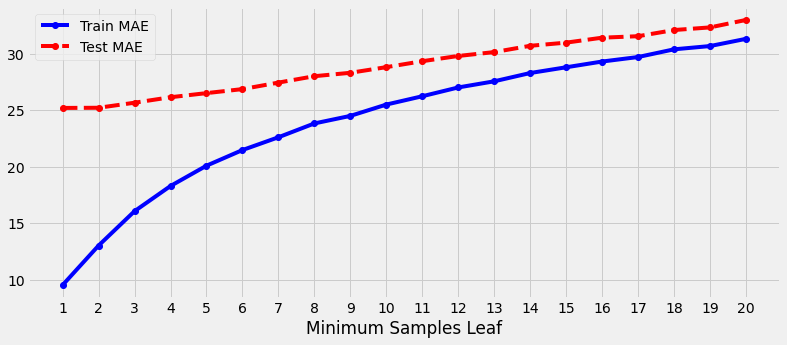

In [21]:
min_samples_leaf = np.arange(1,21)

train_MAEs = []
test_MAEs = []
for msl in min_samples_leaf:
    rf_model = RandomForestRegressor(min_samples_leaf = msl)
    rf_model.fit(train[features], train[target])
    
    train_predictions = rf_model.predict(train[features])
    test_predictions = rf_model.predict(test[features])

    train_MAEs.append(mean_absolute_error(train[target], train_predictions))
    test_MAEs.append(mean_absolute_error(test[target], test_predictions))
    
plt.figure(figsize=(12,5))
plt.plot(min_samples_leaf,train_MAEs, c='b', marker='o', label='line with marker')
plt.plot(min_samples_leaf, test_MAEs, c='r', linestyle='--', marker='o', label='line with marker')
plt.xticks(min_samples_leaf)
plt.xlabel('Minimum Samples Leaf')
plt.legend(['Train MAE', 'Test MAE'])
plt.show()

Increasing __min_samples_leaf__ increases both Train and Test MAE which implies bias and variance are higher. Thus the default setting (=1) for this parameter is optimal

#### Changing max_depth

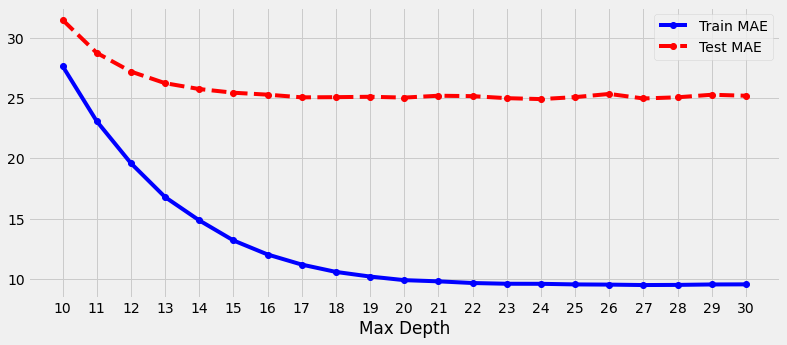

In [22]:
max_depth = np.arange(10,31)

train_MAEs = []
test_MAEs = []
for md in max_depth:
    rf_model = RandomForestRegressor(max_depth = md)
    rf_model.fit(train[features], train[target])
    
    train_predictions = rf_model.predict(train[features])
    test_predictions = rf_model.predict(test[features])

    train_MAEs.append(mean_absolute_error(train[target], train_predictions))
    test_MAEs.append(mean_absolute_error(test[target], test_predictions))
    
plt.figure(figsize=(12,5))
plt.plot(max_depth,train_MAEs, c='b', marker='o', label='line with marker')
plt.plot(max_depth, test_MAEs, c='r', linestyle='--', marker='o', label='line with marker')
plt.xticks(max_depth)
plt.xlabel('Max Depth')
plt.legend(['Train MAE', 'Test MAE'])
plt.show()

Although the errors plateau as __max_depth__ gets higher, there are no harm to the model's performance if this parameter keeps increasing. Thus we don't need to limit this param.

#### Changing min_samples_split

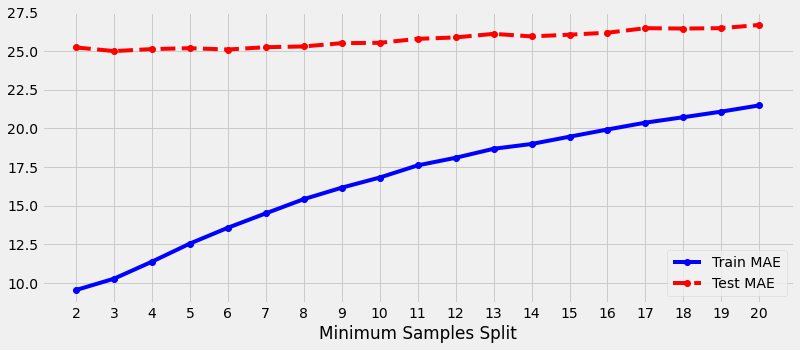

In [23]:
min_samples_split = np.arange(2,21)

train_MAEs = []
test_MAEs = []
for mss in min_samples_split:
    rf_model = RandomForestRegressor(min_samples_split = mss)
    rf_model.fit(train[features], train[target])
    
    train_predictions = rf_model.predict(train[features])
    test_predictions = rf_model.predict(test[features])

    train_MAEs.append(mean_absolute_error(train[target], train_predictions))
    test_MAEs.append(mean_absolute_error(test[target], test_predictions))
    
plt.figure(figsize=(12,5))
plt.plot(min_samples_split,train_MAEs, c='b', marker='o', label='line with marker')
plt.plot(min_samples_split, test_MAEs, c='r', linestyle='--', marker='o', label='line with marker')
plt.xticks(min_samples_split)
plt.xlabel('Minimum Samples Split')
plt.legend(['Train MAE', 'Test MAE'])
plt.show()

Regularize __min_samples_split__ also seems to increase both bias and variance. We will pick the optimal value (=4) that still keeps bias low and improves variance.

#### Changing n_estimators (number of trees in the forest)

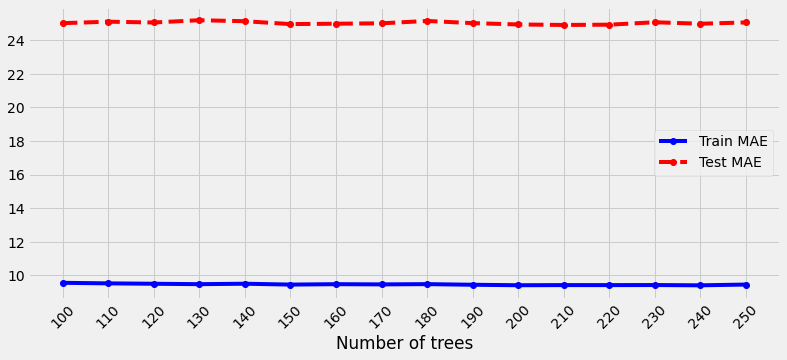

In [24]:
num_of_trees = np.arange(100,251, 10)

train_MAEs = []
test_MAEs = []
for num in num_of_trees:
    rf_model = RandomForestRegressor(n_estimators = num)
    rf_model.fit(train[features], train[target])
    
    train_predictions = rf_model.predict(train[features])
    test_predictions = rf_model.predict(test[features])

    train_MAEs.append(mean_absolute_error(train[target], train_predictions))
    test_MAEs.append(mean_absolute_error(test[target], test_predictions))
    
plt.figure(figsize=(12,5))
plt.plot(num_of_trees,train_MAEs, c='b', marker='o', label='line with marker')
plt.plot(num_of_trees, test_MAEs, c='r', linestyle='--', marker='o', label='line with marker')
plt.xticks(num_of_trees, rotation=45)
plt.xlabel('Number of trees')
plt.legend(['Train MAE', 'Test MAE'])
plt.show()

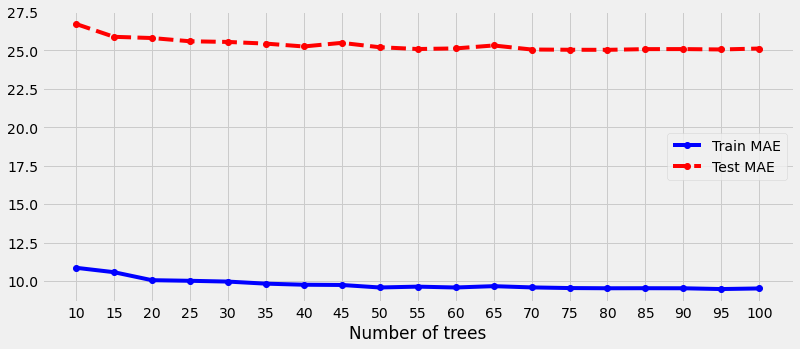

Minimum testing MAE:  25.03752900843882
Corresponding n_estimators:  80


In [25]:
num_of_trees = np.arange(10,101, 5)

train_MAEs = []
test_MAEs = []
for num in num_of_trees:
    rf_model = RandomForestRegressor(n_estimators = num)
    rf_model.fit(train[features], train[target])
    
    train_predictions = rf_model.predict(train[features])
    test_predictions = rf_model.predict(test[features])

    train_MAEs.append(mean_absolute_error(train[target], train_predictions))
    test_MAEs.append(mean_absolute_error(test[target], test_predictions))
    
plt.figure(figsize=(12,5))
plt.plot(num_of_trees,train_MAEs, c='b', marker='o', label='line with marker')
plt.plot(num_of_trees, test_MAEs, c='r', linestyle='--', marker='o', label='line with marker')
plt.xticks(num_of_trees)
plt.xlabel('Number of trees')
plt.legend(['Train MAE', 'Test MAE'])
plt.show()

min_MAE = min(test_MAEs)
min_index = test_MAEs.index(min_MAE)
min_n_estimators = num_of_trees[min_index]
print('Minimum testing MAE: ', min_MAE)
print('Corresponding n_estimators: ', min_n_estimators)

Increase number of trees also do not contribute to the improvements.

#### Changing max_leaf_nodes 

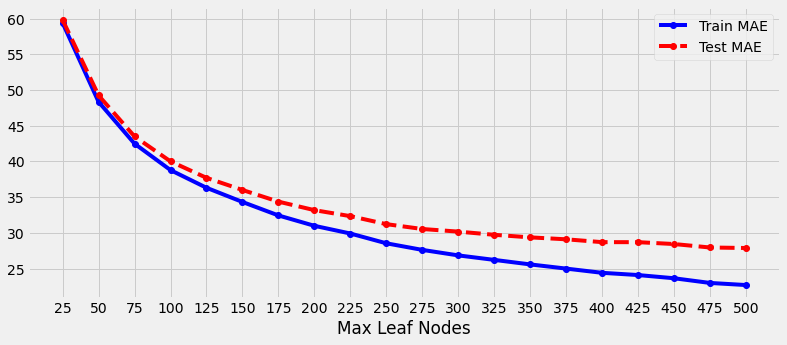

In [26]:
max_leaf_nodes = np.arange(25,501,25)

train_MAEs = []
test_MAEs = []
for mln in max_leaf_nodes:
    rf_model = RandomForestRegressor(max_leaf_nodes = mln)
    rf_model.fit(train[features], train[target])
    
    train_predictions = rf_model.predict(train[features])
    test_predictions = rf_model.predict(test[features])

    train_MAEs.append(mean_absolute_error(train[target], train_predictions))
    test_MAEs.append(mean_absolute_error(test[target], test_predictions))
    
plt.figure(figsize=(12,5))
plt.plot(max_leaf_nodes, train_MAEs, c='b', marker='o', label='line with marker')
plt.plot(max_leaf_nodes, test_MAEs, c='r', linestyle='--', marker='o', label='line with marker')
plt.xticks(max_leaf_nodes)
plt.xlabel('Max Leaf Nodes')
plt.legend(['Train MAE', 'Test MAE'])
plt.show()

### Final RandomForest Settings
Based on our exploration above, the most probably optimal settings are:
- __min_samples_leaf__ = 1
- __max_depth__ = None
- __min_samples_split__ = 3
- __n_estimators__ = 90, since both MAEs started to flat out from n_estimator = 45 we technically can set this parameter to any value between 45 and 100 to speed up the training time. I choose 90 in this case
- __max_leaf_nodes__ = None

In [27]:
features = bike_rentals.columns
features = features.drop(['cnt', 'instant','dteday'], errors='ignore')
print(features)

rf_model = RandomForestRegressor(n_estimators = 90 , min_samples_leaf = 1, min_samples_split = 3)
rf_model.fit(train[features], train[target])

train_predictions = rf_model.predict(train[features])
test_predictions = rf_model.predict(test[features])

train_mae = mean_absolute_error(train[target], train_predictions)
test_mae = mean_absolute_error(test[target], test_predictions)

print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)
print("Test R^2 = ", r2_score(test[target],test_predictions))

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label'],
      dtype='object')
Train MAE =  10.348931338458538
Test MAE =  25.061464886203808
Test R^2 =  0.943684159806226


__Observation__: Compared to default configuration of RandomForest, the __Train MAE__ does increase slightly bit from __9.56__ to __10.3__ while __Test MAE__ effectively remains the same i.e the variance is improved slightly, but the model still suffers from high variance and as being seen above, we could not find an appropriate regularization on the model in which variance can be lowered while bias being kept low or decrease.   

### Cross-validation

We take a step further and implement cross validation using random forest settings as presented above. The function __rf_cross_val()__ takes in dataset, features and target as parameters, then it initializes a RandomForestRegressor and perform cross validation using KFold and cross_validate to return both test and train MAE and $R^2$

In [28]:
def rf_cross_val(df, features, target):
    kf = KFold(10, shuffle=True, random_state = 2)
    rf = RandomForestRegressor(n_estimators = 90 , min_samples_leaf = 2, min_samples_split = 6)
    scores = cross_validate(rf_model, bike_rentals[features], bike_rentals[target], scoring=['neg_mean_absolute_error', 'r2'], return_train_score=True, cv=kf)
    test_mae = np.mean(abs(scores['test_neg_mean_absolute_error']))
    train_mae = np.mean(abs(scores['train_neg_mean_absolute_error']))
    r2 = np.mean(scores['test_r2'])
    return train_mae, test_mae, r2

In [29]:
features = bike_rentals.columns
features = features.drop(['cnt', 'instant','dteday'], errors='ignore')
target = 'cnt'
print(features)

train_mae, test_mae, r2 = rf_cross_val(bike_rentals, features, target)
print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)
print("Test R^2 = ", r2) 


Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label'],
      dtype='object')
Train MAE =  10.185679371431696
Test MAE =  25.24074951113227
Test R^2 =  0.9448576151642099


## Further Improvements 

### Wind chill and Heat Index
Let's see if the model is improved if we calculate a new feature, namely __wind_chill__ and __heat_index__. 

- __Wind_chill__
We will use the formula presented on National Weather Service to calculate wind chill: https://www.weather.gov/epz/wxcalc_windchill

   $Wind Chill Temperature = 35.74 + 0.6215×T - 35.75×V^{0.16} + 0.4275×T×V^{0.16}$
   
   where __T__ is temperature in Farenheit and __V__ is wind speed in mph
 
 
- __Heat_Index__
The formula is derived from this source: https://www.weather.gov/media/epz/wxcalc/heatIndex.pdf

    $Heat Index = -42.379 + (2.04901523×T) + (10.14333127×rh) - (0.22475541 × T × rh) - (6.83783 × 10^{-3} × T^2)
                  - (5.481717 × 10^{-2} × rh^2) + (1.22874 × 10^{-3} × T^2 × rh) + (8.5282 × 10^{-4} × T × rh^2) - (1.99 × 10^{-6} × T^2 × rh^2)$
              
    where __T__ is temperature in Farenheit and __rh__ is relaive humidity

Before applying the formula above, we first need to do some conversion steps on __temp__ and __windspeed__ and create 2 new columns, namely __raw_temp(F)__ and __raw_windspeed(mph)__. The steps include:
- Convert normalized temp to raw temp following the description from the source:
 -  __temp__: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

- Convert raw temp from Celcius to Farenheit


- Convert normalized windspeed to raw windspeed following the descroption from the source:
 - __windspeed__: Normalized wind speed. The values are divided to 67 (max)
 
- Convert raw windspeed from kmph to mph
 

In [30]:
t_min = -8
t_max = 39
bike_rentals['raw_temp(F)'] = bike_rentals['temp']*(t_max - t_min) + t_min #Convert normalized value to raw value
bike_rentals['raw_temp(F)'] = bike_rentals['raw_temp(F)'] * 9/5 + 32 #Convert to Farenheit

bike_rentals['raw_windspeed(mph)'] = bike_rentals['windspeed'] * 67 * 0.62137 #convert normalized windspeed to raw value in mph

bike_rentals['wind_chill'] = 35.74 +0.6215*bike_rentals['raw_temp(F)'] - 35.75*pow(bike_rentals['raw_windspeed(mph)'], 0.16) + 0.4275 * bike_rentals['raw_temp(F)']*pow(bike_rentals['raw_windspeed(mph)'], 0.16)
bike_rentals['heat_index'] = -42.379 + 2.04901523*bike_rentals['raw_temp(F)'] + 10.14333127*bike_rentals['hum'] - 0.22475541*bike_rentals['raw_temp(F)']*bike_rentals['hum'] - 6.83783/1000 * bike_rentals['raw_temp(F)']**2 - 5.481717/100 * bike_rentals['hum']**2 + 1.22874/1000 * bike_rentals['raw_temp(F)']**2 * bike_rentals['hum'] + 8.5282/10000*bike_rentals['raw_temp(F)']*bike_rentals['hum']**2 - 1.99*pow(10,-6)*bike_rentals['raw_temp(F)']**2 * bike_rentals['hum']**2
bike_rentals = bike_rentals.drop(['raw_temp(F)', 'raw_windspeed(mph)'], axis=1)

We can now start training the train set and make predictions on test set. In this case, features __hum__,  __temp__, __raw_temp(F)__, __raw_windspeed(mph)__, and __windspeed__ will be omitted out of features set because __wind_chill__ and __heat_index__ column already captures all of their characteristics.

In [31]:
features = bike_rentals.columns
features = features.drop(['cnt', 'instant','dteday', 'temp', 'hum', 'raw_temp(F)', 'raw_windspeed(mph)', 'windspeed'], errors='ignore')
print(features)

train_mae, test_mae, r2 = rf_cross_val(bike_rentals, features, target)
print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)
print("Test R^2 = ", r2) 

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'time_label', 'wind_chill', 'heat_index'],
      dtype='object')
Train MAE =  10.670840500291181
Test MAE =  26.239745828820094
Test R^2 =  0.9392180838346871


__Observations:__ Adding __wind_chill__ and __heat_index__ even worsens the test MAE a bit (increases from 25.5 to 26.5)

We will seek help from RFECV to find the optimal set of features

### Using RFECV

In [32]:
from sklearn.feature_selection import RFECV
features = bike_rentals.columns
features = features.drop(['cnt', 'instant','dteday'], errors='ignore')

rf_model = RandomForestRegressor(n_estimators = 90 , min_samples_leaf = 1, min_samples_split = 3)
kf = KFold(6, shuffle=True, random_state=1)
selector = RFECV(rf_model, cv=kf)
selector.fit(bike_rentals[features], bike_rentals[target])


RFECV(cv=KFold(n_splits=6, random_state=1, shuffle=True),
      estimator=RandomForestRegressor(min_samples_split=3, n_estimators=90))

In [33]:
features[selector.support_]

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label',
       'wind_chill', 'heat_index'],
      dtype='object')

Looks like the optimal set of feature includes all columns in the dataset. We will conclude our RandomForest algorithm with a final run using features returned from RFECV.

In [34]:
train_mae, test_mae, r2 = rf_cross_val(bike_rentals, features[selector.support_], target)
print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)
print("Test R^2 = ", r2) 

Train MAE =  10.19254188887731
Test MAE =  25.55434744890328
Test R^2 =  0.9440370123927065


## Conclusion
The following table summarizes train , test MAEs and $R^2$ for each of 3 algorithms presented above.

| | Linear | Decision Tree| RandomForest   
|---:|:-------------|:-----------|:------|
| Train MAE | 106.55 | 18.33 | 10.46 | 
| Test MAE  | 103.96 | 31.4 | 25.16 | 
| $R^2$     | 0.385  | 0.908 | 0.944 |

RandomForest has the best performance in predicting the bike rentals for this dataset with $R^2 = 0.945$. It is still not quite conclusive if this is the best performance we could theoretically get. 